<a href="https://colab.research.google.com/github/twishi03/Graph/blob/main/PyKEEN_Loss_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/pykeen/pykeen/blob/master/notebooks/results_plots/results_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Results Plotting Demo

This notebook serves to make some simple plots of the 1) losses and 2) entities and relations following training with the PyKEEN pipeline.

In [1]:
! python -c "import pykeen" || pip install git+https://github.com/pykeen/pykeen.git

Traceback (most recent call last):
  File "<string>", line 1, in <module>
ModuleNotFoundError: No module named 'pykeen'
  Cloning https://github.com/pykeen/pykeen.git to /tmp/pip-req-build-7zvptk0a
  Running command git clone --filter=blob:none --quiet https://github.com/pykeen/pykeen.git /tmp/pip-req-build-7zvptk0a
  Resolved https://github.com/pykeen/pykeen.git to commit 5e931551c9761b5e6554a8752285f1bd3f5ea69d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.1 MB/s eta 0:00:00
  Created wheel for pykeen: filename=pykeen-1.10.3.dev0-py3-none-any.whl size=718505 sha256=6473577f96305dd2f4f2de96222d9330215d17

In [2]:
import os

import numpy as np
from matplotlib import pyplot as plt

import pykeen
from pykeen.pipeline import pipeline
from pykeen.triples import TriplesFactory

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

INFO:pykeen.utils:Using opt_einsum


In [3]:
pykeen.env()

Key,Value
OS,posix
Platform,Linux
Release,6.1.85+
Time,Sat Oct 26 22:29:42 2024
Python,3.10.12
PyKEEN,1.10.3-dev
PyKEEN Hash,UNHASHED
PyKEEN Branch,
PyTorch,2.5.0+cu121
CUDA Available?,true


## Toy Example

Following the disussions proposed in https://github.com/pykeen/pykeen/issues/97, a very small set of triples are trained and visualized.

In [4]:
os.makedirs("results", exist_ok=True)

triples = """
Brussels	locatedIn	Belgium
Belgium	partOf	EU
EU	hasCapital	Brussels
""".strip()

triples = np.array([triple.split("\t") for triple in triples.split("\n")])
tf = TriplesFactory.from_labeled_triples(triples=triples)

Training with default arguments

INFO:pykeen.pipeline.api:Using device: cpu


Training epochs on cpu:   0%|          | 0/5 [00:00<?, ?epoch/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.23s seconds


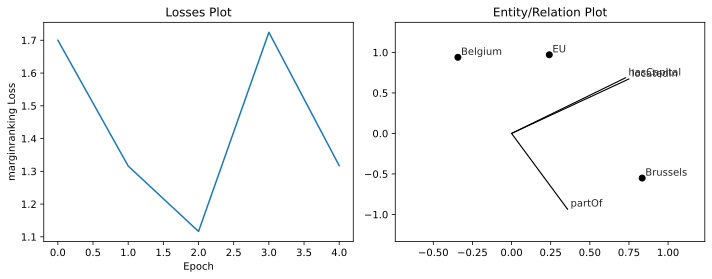

In [5]:
results = pipeline(
    training=tf,
    testing=tf,
    model="TransE",
    model_kwargs=dict(embedding_dim=2),
    training_kwargs=dict(use_tqdm_batch=False),
    evaluation_kwargs=dict(use_tqdm=False),
    random_seed=1,
    device="cpu",
)
results.plot(er_kwargs=dict(plot_relations=True))
plt.savefig("results/toy_1.png", dpi=300)

Training with slower learning and more epochs

INFO:pykeen.pipeline.api:Using device: cpu


Training epochs on cpu:   0%|          | 0/128 [00:00<?, ?epoch/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds


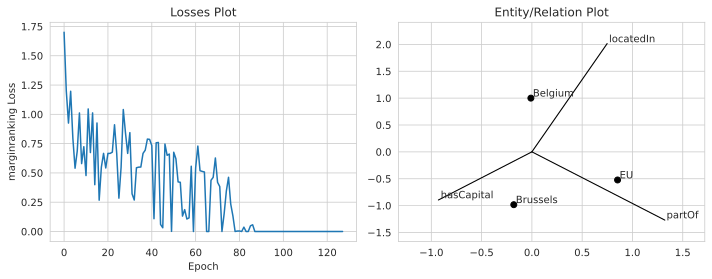

In [6]:
results = pipeline(
    training=tf,
    testing=tf,
    model="TransE",
    model_kwargs=dict(embedding_dim=2),
    optimizer_kwargs=dict(lr=1.0e-1),
    training_kwargs=dict(num_epochs=128, use_tqdm_batch=False),
    evaluation_kwargs=dict(use_tqdm=False),
    random_seed=1,
    device="cpu",
)
results.plot(er_kwargs=dict(plot_relations=True))
plt.savefig("results/toy_2.png", dpi=300)

Training with appropriate softplus

In [7]:
toy_results = pipeline(
    training=tf,
    testing=tf,
    model="TransE",
    loss="softplus",
    model_kwargs=dict(embedding_dim=2),
    optimizer_kwargs=dict(lr=1.0e-1),
    training_kwargs=dict(num_epochs=128, use_tqdm_batch=False),
    evaluation_kwargs=dict(use_tqdm=False),
    random_seed=1,
    device="cpu",
)

INFO:pykeen.pipeline.api:Using device: cpu


Training epochs on cpu:   0%|          | 0/128 [00:00<?, ?epoch/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.05s seconds


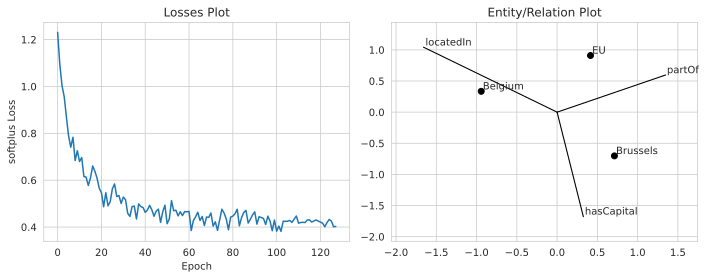

In [8]:
toy_results.plot(er_kwargs=dict(plot_relations=True))
plt.savefig("results/toy_3.png", dpi=300)

## Benchmark Dataset Example

In [9]:
nations_results = pipeline(
    dataset="Nations",
    model="TransE",
    model_kwargs=dict(embedding_dim=8),
    optimizer_kwargs=dict(lr=1.0e-1),
    training_kwargs=dict(num_epochs=80, use_tqdm_batch=False),
    evaluation_kwargs=dict(use_tqdm=False),
    random_seed=1,
    device="cpu",
)

INFO:pykeen.datasets.utils:Caching preprocessed dataset to file:///root/.data/pykeen/datasets/nations/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM
INFO:pykeen.triples.triples_factory:Stored TriplesFactory(num_entities=14, num_relations=55, create_inverse_triples=False, num_triples=1592, path="/usr/local/lib/python3.10/dist-packages/pykeen/datasets/nations/train.txt") to file:///root/.data/pykeen/datasets/nations/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/training
INFO:pykeen.datasets.base:Stored training factory to file:///root/.data/pykeen/datasets/nations/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/training
INFO:pykeen.triples.triples_factory:Stored TriplesFactory(num_entities=14, num_relations=55, create_inverse_triples=False, num_triples=201, path="/usr/local/lib/python3.10/dist-packages/pykeen/datasets/nations/test.txt") to file:///root/.data/pykeen/datasets/nations/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/testing
INFO:pykeen.datasets.base:Stored testing factory to file:///root/.data/pykeen/datase

Training epochs on cpu:   0%|          | 0/80 [00:00<?, ?epoch/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.06s seconds


(<Figure size 1000x400 with 2 Axes>,
 array([<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>,
        <Axes: title={'center': 'Entity/Relation Plot using PCA'}>],
       dtype=object))

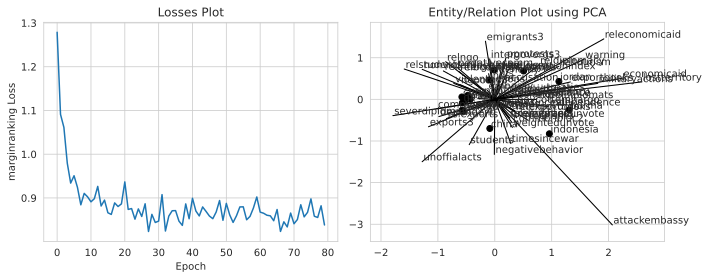

In [10]:
nations_results.plot(er_kwargs=dict(plot_relations=True))

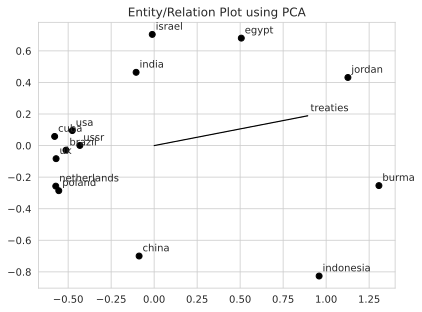

In [11]:
# Filter the ER plot down to a specific set of entities and relations
nations_results.plot_er(
    relations={"treaties"},
    apply_limits=False,
    plot_relations=True,
);